# How to Detect an Unfair Coin

Let's assume you're flipping a coin with a friend 100 times and she wins with 62 heads against 38 tails.

You know a little bit about statistics and probability and that because of the [law of large numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers) a fair coin is supposed to come up roughly 50% heads and 50% tails of the time (at least in the long run). You're suspicious and ask yourself if the coin might be biased 🤔 But how can you tell? Could the outcome just be a fluke? Did your friend just get lucky?

## Hypothesis Testing

Let's conduct a one-sided [hypothesis test](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing) to find out. We define the two competing hypotheses as follows:

- the **[null hypothesis](https://en.wikipedia.org/wiki/Null_hypothesis) *H<sub>N</sub>*** assumes the coin is fair with ***p(heads) = p(tails) = 0.5***
- the **[alternative hypotheses](https://en.wikipedia.org/wiki/Alternative_hypothesis) *H<sub>A</sub>*** assumes the coin is biased in favor of heads with ***p(heads) > 0.5***

Let's assume *H<sub>N</sub>* is true and determine how likely it is to observe 62 or more heads using a fair coin. If this probability *p(heads ≥ 62|H<sub>N</sub> true)* is smaller than the conventional [significance level](https://en.wikipedia.org/wiki/Statistical_significance) of *alpha = 0.05* (5%), we reject *H<sub>N</sub>* in favor of *H<sub>A</sub>*. Next, let's calculate this probability with the [*p*-value](https://en.wikipedia.org/wiki/P-value) from the normal distribution of 100 coin tosses.

*Note:* Incorrectly rejecting *H<sub>N</sub>* when it's actually true (the coin is not biased) is called a [type I error](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors) (false positive).

## *P*-Value

In [1]:
from scipy.stats import norm
import math

def mean(n, p):
    "Returns the mean of a normal distribution with sample size n and probability p"
    return n * p

def sd(n, p):
    "Returns the standard deviation of a normal distribution with sample size n and probability p"
    return math.sqrt(mean(n, p) * (1 - p))

def p_value(x, n, p, lower_tail=False):
    "Returns the p-value at x from a normal distribution with sample size n and probability p"
    p = norm.sf(x, mean(n, p), sd(n, p))
    return (1 - p) if lower_tail else p

p_fair_coin = 0.5 # probability of a fair coin
n_flips = 100 # total number of coin flips
n_heads = 60 # number of heads after n_flips

p_value(n_heads, n_flips, p_fair_coin)

0.022750131948179195

Since *p(heads ≥ 60|H<sub>N</sub> true) = 0.023* there's only a 2.3% chance that 60 or more heads would come up using a fair coin. This also means we have a 2.3% chance of making a type I error (incorrectly rejecting a fair coin).

Visually, this probability corresponds to the red-shaded area under the normal distribution for 100 coin flips.

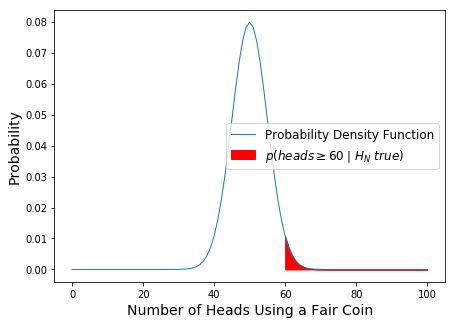

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, n_flips, n_flips+1) # [0,1,…,n_flips]
y = norm.pdf(x, mean(n_flips, p_fair_coin), sd(n_flips, p_fair_coin)) # probability of heads using a fair coin

plt.figure(figsize=(7, 5))
plt.plot(x, y, linewidth=1, label='Probability Density Function')
plt.fill_between(x[n_heads:], y[n_heads:], color='red', label='$p(heads \geq 60 \mid H_N \ true)$')
plt.xlabel('Number of Heads Using a Fair Coin', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.legend(fontsize=12)
plt.show()

Since *p = 0.023 < 0.05 = alpha* we **reject our null hypothesis *H<sub>N</sub>*** at the 5% significance level and **accept the alternative hypothesis *H<sub>A</sub>***. We conclude that the coin is most likely biased. However, to be more confident about correctly rejecting *H<sub>N</sub>*, we should also calculate the [statistical power](https://en.wikipedia.org/wiki/Statistical_power) of our hypothesis test.

## Statistical Power

The power value *p(H<sub>N</sub> false|H<sub>A</sub> true)* tells us the probability that we'll correctly reject *H<sub>N</sub>* given that *H<sub>A</sub>* is true. In other words, it's the ability to detect a biased coin if the coin is actually biased.

The statistical power of our hypothesis test depends on the following factors:

- The effect size or the size of the bias: a large bias is easier to detect than a small one
- The sample size: the bigger the sample size, the easier it is to detect small biases

Unfortunately, we must either guess or know the true probability of our coin to calculate the statistical power. Since we observed 60 heads and we don't know the true probability of the coin, let's assume *p(heads) = 0.6*.

In [3]:
p_unfair_coin = 0.6
p_value(60, n_flips, p_unfair_coin)

0.5

This tells us that 50% of all experiments using a biased coin with *p(heads) = 0.6* and heads coming up 60 or more times will correctly reject *H<sub>N</sub>* after 100 coin flips.

However, this is also means that 50% will fail to reject *H<sub>N</sub>* even though the coin is actually biased (*H<sub>N</sub>* is false and *H<sub>A</sub>* is true). This complement of the power is the so called beta value and is defined as ***beta = 1 – power***. It tells us the probability of making a [type II error](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors) (false negative).

To increase the statistical power of our hypothesis test and decrease beta (the probability of a type II error), we should increase the sample size. To see why this works, let's plot the statistical power of our biased coin with *p(heads) = 0.6* for 100 coin flips and compare it with the statistical power of 1,000 coin flips.

Flipping a fair coin 100 times, the mean is 50 and the standard deviation is 5.
Flipping a fair coin 1,000 times, the mean is 500 and the standard deviation is 16.


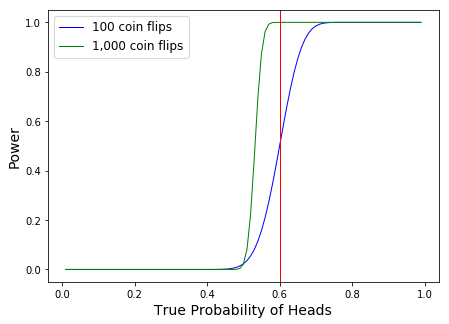

power(100 coin flips and p(heads) = 0.6) = 0.5
power(1,000 coin flips and p(heads) = 0.6) = 0.9999943163152212


In [4]:
probs = np.linspace(1/100, 99/100, 99)

mean100 = 50 # mean of flipping a fair coin 100 times
sigma100 = round(math.sqrt(mean100 * (1 - p_fair_coin))) # standard deviation
power100 = [p_value(mean100 + 2 * sigma100, 100, x) for x in probs]

mean1k = 500 # mean of flipping a fair coin 1,000 times
sigma1k = round(math.sqrt(mean1k * (1 - p_fair_coin))) # standard deviation
power1k = [p_value(mean1k + 2 * sigma1k, 1000, x) for x in probs]

print(f"Flipping a fair coin 100 times, the mean is {mean100} and the standard deviation is {sigma100}.")
print(f"Flipping a fair coin 1,000 times, the mean is {mean1k} and the standard deviation is {sigma1k}.")

plt.figure(figsize=(7,5))
plt.plot(probs, power100, linewidth=1, color='b', label='100 coin flips')
plt.plot(probs, power1k, linewidth=1, color='g', label='1,000 coin flips')
plt.axvline(0.6, linewidth=1, color='r')
plt.xlabel('True Probability of Heads', fontsize=14)
plt.ylabel('Power', fontsize=14)
plt.legend(fontsize=12)
plt.show()

print(f"power(100 coin flips and p(heads) = 0.6) = {power100[59]}")
print(f"power(1,000 coin flips and p(heads) = 0.6) = {power1k[59]}")

As we can see, using a larger sample size results in a much higher statistical power (99.9% for 1,000 coin flips) and we can be more confident about rejecting *H<sub>N</sub>*. This is simply because of the [law of large numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers) it's a lot less likely to observe 532 heads (two standard deviations from the mean) after 1,000 coin flips than it is to observe 60 heads after 100 coin flips with a fair coin.

*Note:* If our statistical power is low (and beta high) and we fail to reject *H<sub>N</sub>*, we're making a [type II error](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors) (false negative).

Now, how do we find the minimum number of heads (again at the 5% significance level) at which we should be suspicious that our friend is cheating?

In [5]:
alpha = 0.05
norm.ppf(1-alpha, mean(n_flips, p_fair_coin), sd(n_flips, p_fair_coin))

58.224268134757359

When flipping a coin 100 times, we should reject *H<sub>N</sub>* after 59 or more heads. However, the statistical power is very low at this point and the probability of making a type II error (beta) is high.

What if you flipped the coin only 20 times? At which point would you suspect your friend of cheating?

In [6]:
n_flips = 20
[(x, p_value(x, n_flips, p_fair_coin) < 0.05) for x in range(int(n_flips/2), n_flips+1)]

[(10, False),
 (11, False),
 (12, False),
 (13, False),
 (14, True),
 (15, True),
 (16, True),
 (17, True),
 (18, True),
 (19, True),
 (20, True)]

As we can see, if heads comes up 14 or more times, we can reject *H<sub>N</sub>* at the 5% significance level and conclude that the coin is probably biased in favor of coming up heads. Nevertheless, the sample size of 20 is very small and we should always remember to check the statistical power of our hypothesis test (it's only 18.1%) to avoid making a type II error.

## Conclusion

If heads comes up 60 times, there's enough statistically sufficient evidence to reject *H<sub>N</sub>* in favor of *H<sub>A</sub>* and conclude that the coin is biased. However, the statistical power of our hypothesis test, the probability of correctly rejecting *H<sub>N</sub>* when it's actually biased, is only 50% and a power value of at least 80% is usually desired by statisticians.

The chances of making a type I or a type II error, and the sample and effect size go hand in hand. Unfortunately, with only 100 coin flips and our observed effect size (60 heads vs. the mean of our distribution at 50 heads), we can't have a low probability of making a type I error (alpha) and a low probability of making a type II error (beta) at the same time. There's just too little data to always distinguish between a biased coin and pure luck. Increasing the sample size would solve this problem, but this is not always possible.

Depending on the value of your friendship and what's at stake, you should pick an appropriate significance level at which you reject the null hypothesis in favor of the alternative hypothesis. If making a type I error is more costly or dangerous (e.g. you don't want to jeopardize your friendship), choose a smaller significance level (e.g. *alpha = 0.01*). If making a type II error is more costly or dangerous (e.g. it's just an acquaintance and a lot of money is at stake), choose a higher significance level (e.g. *alpha = 0.1*) instead.

## Warning

Statistics can be unintuitive and it's good to be aware of the many pitfalls and [misunderstandings of *p*-values](https://en.wikipedia.org/wiki/Misunderstandings_of_p-values). There are also alternative measures of confidence to *p*-values, such as [confidence intervals](https://en.wikipedia.org/wiki/Confidence_interval) and [Bayes factors](https://en.wikipedia.org/wiki/Bayes_factor).

## Related Links

- [Statistics Done Wrong](https://www.statisticsdonewrong.com)
- [Science Isn't Broken](https://fivethirtyeight.com/features/science-isnt-broken/)
- [*p*-hacking](https://en.wikipedia.org/wiki/Data_dredging)
- [Scientific method: Statistical errors](http://www.nature.com/news/scientific-method-statistical-errors-1.14700)